In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("paper")
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()
from sklearn.metrics import r2_score
import scipy as sp

In [3]:
ep = pd.read_csv("gtdb-rs202.evolpaths.protein.csv.gz")
ep

comparison_name      anchor_name     compare_name  \
0      GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
1      GCA_004524385.1_x_GCA_004524535.1  GCA_004524385.1  GCA_004524535.1   
2      GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
3      GCA_004524385.1_x_GCA_011364975.1  GCA_004524385.1  GCA_011364975.1   
4      GCA_004524385.1_x_GCF_008000775.1  GCA_004524385.1  GCF_008000775.1   
...                                  ...              ...              ...   
98275  GCA_002409405.1_x_GCA_002317435.1  GCA_002409405.1  GCA_002317435.1   
98276  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
98277  GCA_002409405.1_x_GCA_003567135.1  GCA_002409405.1  GCA_003567135.1   
98278  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   
98279  GCA_002409405.1_x_GCF_004319585.1  GCA_002409405.1  GCF_004319585.1   

          path lowest_common_rank alphabet  ksize  scaled   jaccard  \
0        path1              genus  protein      7     100  0.257015   
1        path1              genus  protein      7     200  0.256108   
2        path1             family  protein      7     100  0.027745   
3        path1             family  protein      7     200  0.027002   
4        path1              order  protein      7     100  0.007232   
...        ...                ...      ...    ...     ...       ...   
98275  path999              class  protein     10     200  0.002932   
98276  path999             phylum  protein     10     100  0.001910   
98277  path999             phylum  protein     10     200  0.001676   
98278  path999       superkingdom  protein     10     100  0.000573   
98279  path999       superkingdom  protein     10     200  0.000677   

       max_containment  ...  EzAAIm coverage threshold  EzAAIb AAI  \
0             0.615836  ...                        0.5    0.929249   
1             0.608974  ...                        0.5    0.929249   
2             0.084447  ...                        0.5    0.634232   
3             0.081731  ...                        0.5    0.634232   
4             0.025111  ...                        0.5    0.512164   
...                ...  ...                        ...         ...   
98275         0.007312  ...                        0.5    0.541283   
98276         0.004136  ...                        0.5    0.507907   
98277         0.003613  ...                        0.5    0.507907   
98278         0.001179  ...                        0.5    0.484488   
98279         0.001364  ...                        0.5    0.484488   

       EzAAIb anchor CDS count  EzAAIb compare CDS count  \
0                         1965                      3590   
1                         1965                      3590   
2                         1965                      3596   
3                         1965                      3596   
4                         1965                      3935   
...                        ...                       ...   
98275                     3045                      2107   
98276                     3045                      2723   
98277                     3045                      2723   
98278                     3045                      3603   
98279                     3045                      3603   

       EzAAIb matched CDS count  EzAAIb proteome coverage  \
0                          1583                  0.569937   
1                          1583                  0.569937   
2                          1057                  0.380147   
3                          1057                  0.380147   
4                           482                  0.163390   
...                         ...                       ...   
98275                       356                  0.138199   
98276                       369                  0.127947   
98277                       369                  0.127947   
98278                       283                  0.085138   
98

In [4]:
ep.columns

Index(['comparison_name', 'anchor_name', 'compare_name', 'path',
       'lowest_common_rank', 'alphabet', 'ksize', 'scaled', 'jaccard',
       'max_containment', 'anchor_containment', 'compare_containment',
       'anchor_hashes', 'compare_hashes', 'num_common', 'jaccard AAI',
       'containA AAI', 'containAaai_low', 'containAaai_high', 'containB AAI',
       'containBaai_low', 'containBaai_high', 'maxContain AAI', 'acANI',
       'alpha-ksize', 'compareM AAI', 'compareM_std_aai', 'genes_in_anchor',
       'genes_in_ref', 'orthologous_genes', 'orthologous_fraction',
       'ANIb ident', 'ANIb_coverage', 'ANIb_aln_length', 'ANIb_sim_errors',
       'ANIb_hadamard', 'ANIm ident', 'ANIm_coverage', 'ANIm_aln_length',
       'ANIm_sim_errors', 'ANIm_hadamard', 'fastani ANI',
       'num_bidirectional_fragment_mappings', 'total_query_fragments',
       'EzAAIm AAI', 'EzAAIm anchor CDS count', 'EzAAIm compare CDS count',
       'EzAAIm matched CDS count', 'EzAAIm proteome coverage',
       '

In [160]:
ep["average_containment"] = (ep["anchor_containment"]+ ep["compare_containment"])/2

In [5]:
len(ep[ep["EzAAIb AAI"].notna()] )

98280

In [111]:
compare_id_vars = ["comparison_name", "path", 
                   "lowest_common_rank", "anchor_name", 
                   "compare_name", "alpha-ksize", 
                   "alphabet", "ksize","scaled", 
                   #"fastani ANI", "ANIm ident", 
                    #"ANIb ident", "ANIb_coverage",
                   "average_containment",
                   "EzAAIb AAI", "EzAAIb proteome coverage"]

prot_value_vars = ["jaccard AAI", "containA AAI", 
                   "containB AAI", "maxContain AAI", 
                   "minContain AAI", "avgContain AAI",
                   "compareM AAI", "EzAAIm AAI"]

rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]

aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "ezAAIm AAI": "#4E0707",
              "EzAAIm AAI": "#A3623A"}

blues=sns.color_palette("Blues", 10)
blues_hex = blues.as_hex()[4:]
prot_order = ["protein-7", "protein-8", "protein-9", "protein-10", "protein-11"]
protein_colors = dict(zip(prot_order, blues_hex))


In [112]:
protein_colors

{'protein-7': '#7db8da',
 'protein-8': '#5ca4d0',
 'protein-9': '#3f8fc5',
 'protein-10': '#2676b8',
 'protein-11': '#135fa7'}

In [164]:
melted=pd.melt(ep,id_vars= compare_id_vars,
                     value_vars=prot_value_vars,
                     var_name='estimator', value_name='AAI')
melted

comparison_name     path lowest_common_rank  \
0       GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1       GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2       GCA_004524385.1_x_GCA_011364975.1    path1             family   
3       GCA_004524385.1_x_GCA_011364975.1    path1             family   
4       GCA_004524385.1_x_GCF_008000775.1    path1              order   
...                                   ...      ...                ...   
786235  GCA_002409405.1_x_GCA_002317435.1  path999              class   
786236  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
786237  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
786238  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
786239  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

            anchor_name     compare_name alpha-ksize alphabet  ksize  scaled  \
0       GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     100   
1       GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     200   
2       GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     100   
3       GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     200   
4       GCA_004524385.1  GCF_008000775.1   protein-7  protein      7     100   
...                 ...              ...         ...      ...    ...     ...   
786235  GCA_002409405.1  GCA_002317435.1  protein-10  protein     10     200   
786236  GCA_002409405.1  GCA_003567135.1  protein-10  protein     10     100   
786237  GCA_002409405.1  GCA_003567135.1  protein-10  protein     10     200   
786238  GCA_002409405.1  GCF_004319585.1  protein-10  protein     10     100   
786239  GCA_002409405.1  GCF_004319585.1  protein-10  protein     10     200   

        average_containment  EzAAIb AAI  EzAAIb proteome coverage  \
0                  0.460963    0.929249                  0.569937   
1                  0.457744    0.929249                  0.569937   
2                  0.062064    0.634232                  0.380147   
3                  0.060246    0.634232                  0.380147   
4                  0.017583    0.512164                  0.163390   
...                     ...         ...                       ...   
786235             0.006091    0.541283                  0.138199   
786236             0.003837    0.507907                  0.127947   
786237             0.003365    0.507907                  0.127947   
786238             0.001146    0.484488                  0.085138   
786239             0.001352    0.484488                  0.085138   

          estimator       AAI  
0       jaccard AAI  0.880078  
1       jaccard AAI       NaN  
2       jaccard AAI  0.659027  
3       jaccard AAI       NaN  
4       jaccard AAI  0.545423  
...             ...       ...  
786235   EzAAIm AAI  0.543715  
786236   EzAAIm AAI  0.507298  
786237   EzAAIm AAI  0.507298  
786238   EzAAIm AAI  0.485674  
786239   EzAAIm AAI  0.485674  

[786240 rows x 14 columns]

In [165]:
melted["AAIdiff"] = melted["AAI"] - melted['EzAAIb AAI']
melted

comparison_name     path lowest_common_rank  \
0       GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1       GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2       GCA_004524385.1_x_GCA_011364975.1    path1             family   
3       GCA_004524385.1_x_GCA_011364975.1    path1             family   
4       GCA_004524385.1_x_GCF_008000775.1    path1              order   
...                                   ...      ...                ...   
786235  GCA_002409405.1_x_GCA_002317435.1  path999              class   
786236  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
786237  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
786238  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
786239  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

            anchor_name     compare_name alpha-ksize alphabet  ksize  scaled  \
0       GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     100   
1       GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     200   
2       GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     100   
3       GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     200   
4       GCA_004524385.1  GCF_008000775.1   protein-7  protein      7     100   
...                 ...              ...         ...      ...    ...     ...   
786235  GCA_002409405.1  GCA_002317435.1  protein-10  protein     10     200   
786236  GCA_002409405.1  GCA_003567135.1  protein-10  protein     10     100   
786237  GCA_002409405.1  GCA_003567135.1  protein-10  protein     10     200   
786238  GCA_002409405.1  GCF_004319585.1  protein-10  protein     10     100   
786239  GCA_002409405.1  GCF_004319585.1  protein-10  protein     10     200   

        average_containment  EzAAIb AAI  EzAAIb proteome coverage  \
0                  0.460963    0.929249                  0.569937   
1                  0.457744    0.929249                  0.569937   
2                  0.062064    0.634232                  0.380147   
3                  0.060246    0.634232                  0.380147   
4                  0.017583    0.512164                  0.163390   
...                     ...         ...                       ...   
786235             0.006091    0.541283                  0.138199   
786236             0.003837    0.507907                  0.127947   
786237             0.003365    0.507907                  0.127947   
786238             0.001146    0.484488                  0.085138   
786239             0.001352    0.484488                  0.085138   

          estimator       AAI   AAIdiff  
0       jaccard AAI  0.880078 -0.049171  
1       jaccard AAI       NaN       NaN  
2       jaccard AAI  0.659027  0.024795  
3       jaccard AAI       NaN       NaN  
4       jaccard AAI  0.545423  0.033259  
...             ...       ...       ...  
786235   EzAAIm AAI  0.543715  0.002432  
786236   EzAAIm AAI  0.507298 -0.000610  
786237   EzAAIm AAI  0.507298 -0.000610  
786238   EzAAIm AAI  0.485674  0.001186  
786239   EzAAIm AAI  0.485674  0.001186  

[786240 rows x 15 columns]

In [166]:
melted['scaled'].unique()

array([100, 200])

In [167]:
scaled200 = melted[melted["scaled"] == 200]
scaled100 = melted[melted["scaled"] == 100]

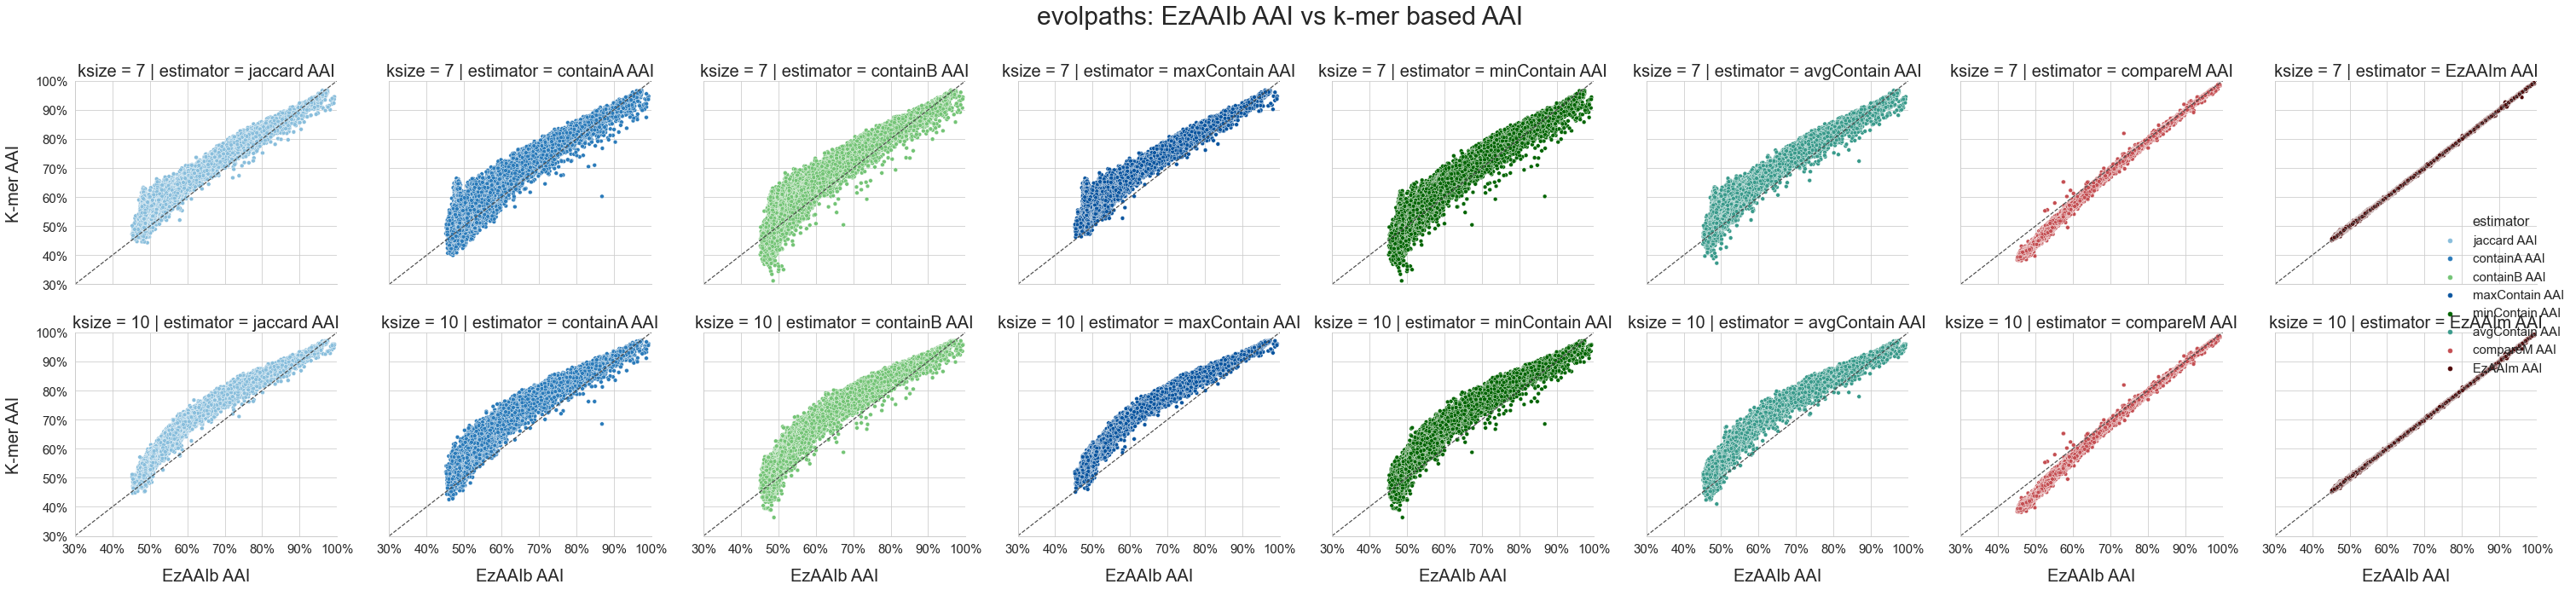

In [168]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled100, 
                  x="EzAAIb AAI", y="AAI", 
                  hue="estimator",col="estimator", 
                  row="ksize", palette=aai_colors)
    
    #plt.gcf().set_size_inches(11, 7)
    xlim=(0.3, 1)
    ylim= (0.3, 1)
    for ax in g.fig.axes:
        ax.set(xlim=xlim, ylim=ylim)
        ax.plot(xlim, ylim, ls="--", c=".3")
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    
    g.set_axis_labels("EzAAIb AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('evolpaths: EzAAIb AAI vs k-mer based AAI')
    g.fig.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

In [169]:
scaled100_k10 = scaled100[scaled100['ksize'] == 10]
scaled100_k7 = scaled100[scaled100['ksize'] == 7]
scaled200_k10 = scaled200[scaled200['ksize'] == 10]
scaled200_k7 = scaled200[scaled200['ksize'] == 7]

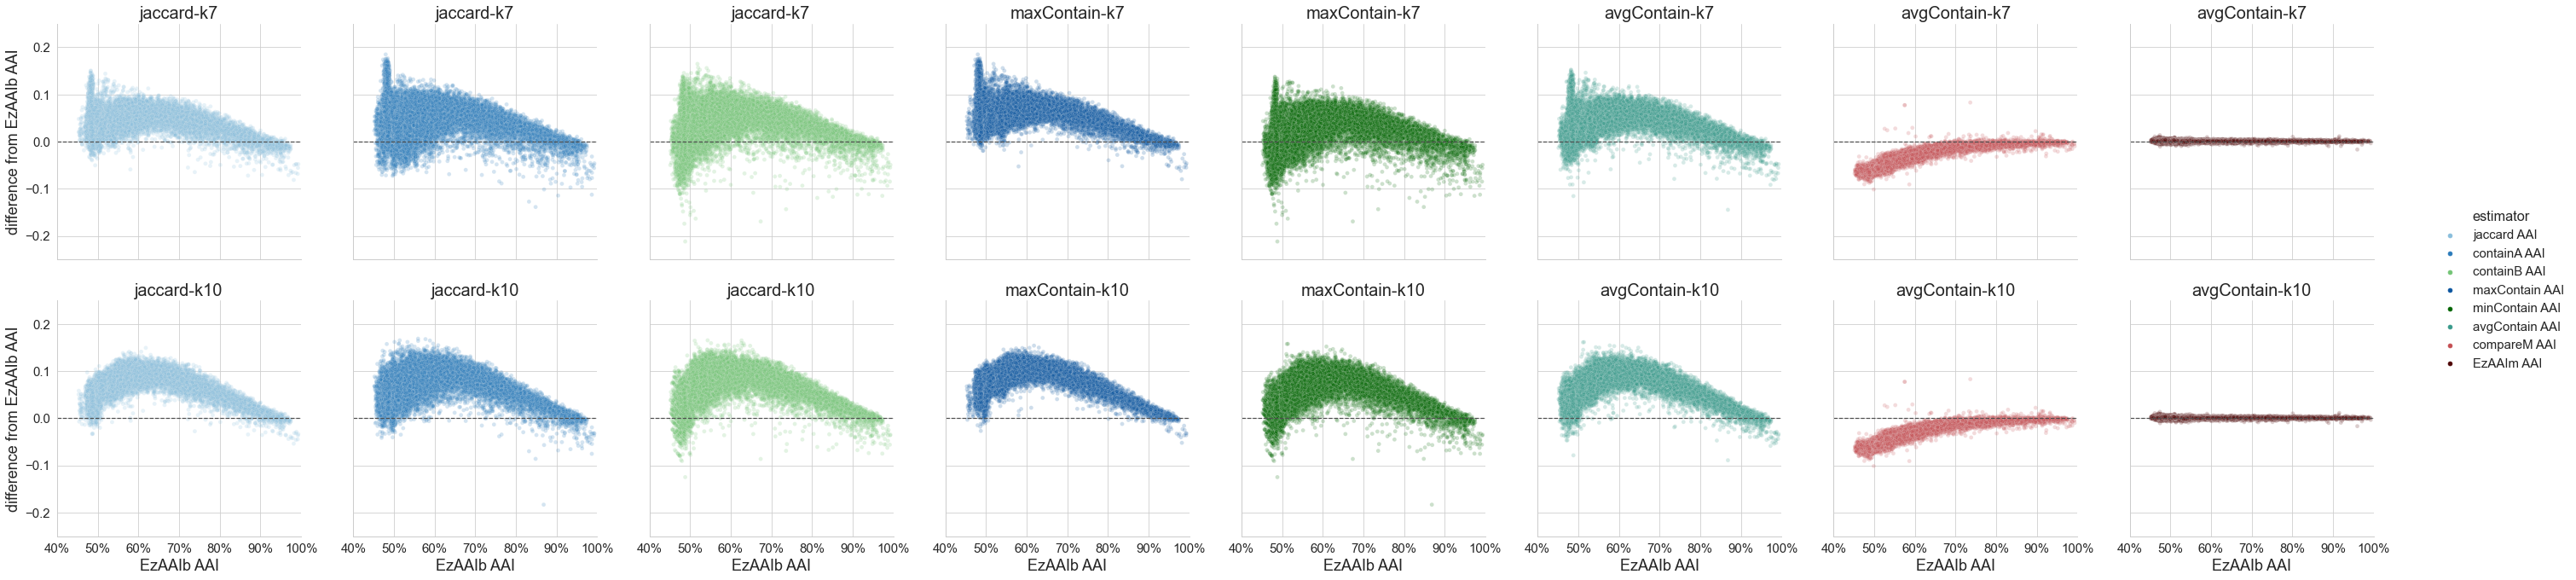

In [170]:
#sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=scaled100, x="EzAAIb AAI", y="AAIdiff", hue="estimator",col="estimator",row="ksize", palette=aai_colors, alpha=0.2)
    g.set(xlim=(.4, 1), ylim=(-0.25, 0.25))

    for ax in g.fig.axes:
        ax.axhline(0, ls="--", c=".3")
        ax.set_xlabel("EzAAIb AAI", size=18)
        ax.set_ylabel("difference from EzAAIb AAI", size=18)
        ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
   #     ax.yaxis.set_major_locator(ticker.MultipleLocator(0.01))
        #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        title = ax.get_title()
        if "jaccard" in title:
            new_title = "jaccard"
        elif "max" in title:
            new_title = "maxContain"
        elif "avg" in title:
            new_title = "avgContain"
        if "7" in title and "7" not in new_title:
            new_title += "-k7"
        elif "10" in title and "10" not in new_title:
            new_title += "-k10"
        #print(title, new_title)
        ax.set_title(new_title)
        #new_title=""
    g.tight_layout()

Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIb AAI')

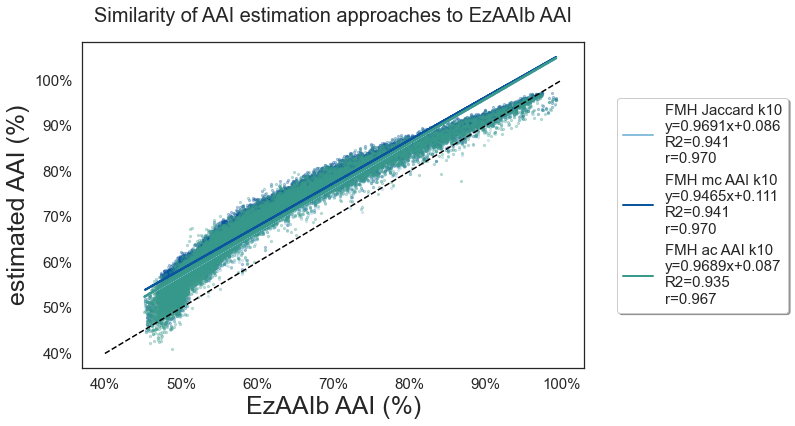

In [171]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]#, "EzAAIm AAI", "CompareM AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k10", "maxContain AAI": "FMH mc AAI k10", "avgContain AAI": "FMH ac AAI k10"}#, "EzAAIm AAI": "EzAAIm AAI", "CompareM AAI": "CompareM AAI"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled100_k10[scaled100_k10['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("EzAAIb AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to EzAAIb AAI", pad=20, size=20)



Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIb AAI')

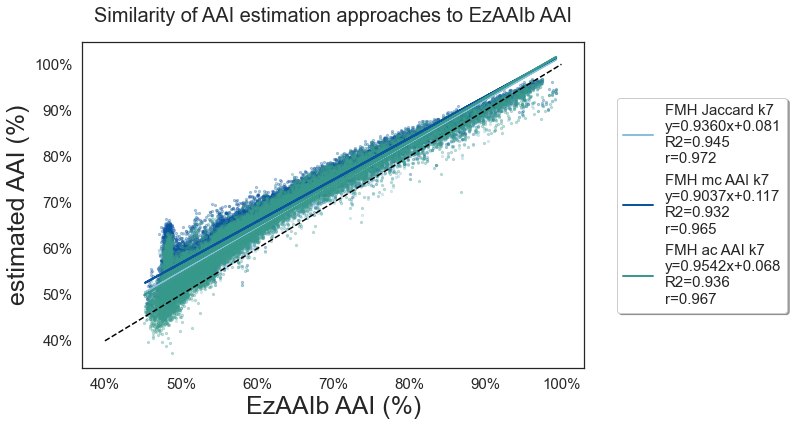

In [172]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    df = scaled100_k7[scaled100_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estimated AAI (%)", size=25)
ax.set_xlabel("EzAAIb AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to EzAAIb AAI", pad=20, size=20)


# AAIdiff

Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIb AAI')

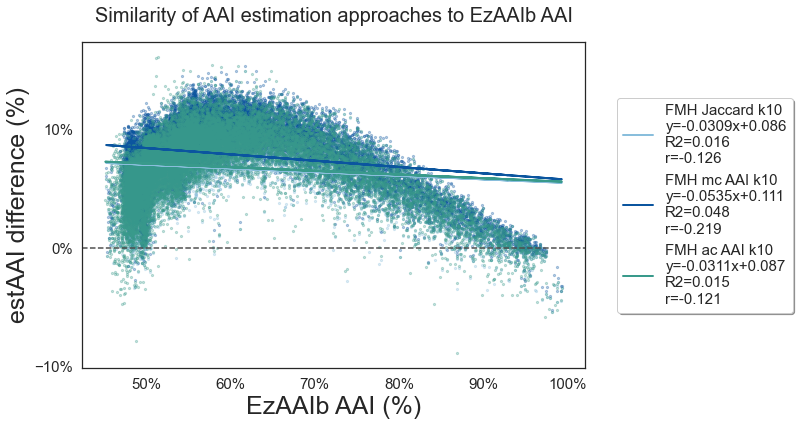

In [173]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k10", "maxContain AAI": "FMH mc AAI k10", "avgContain AAI": "FMH ac AAI k10"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIb AAI"
    y_col = "AAIdiff"
    color = aai_colors[var]
    df = scaled100_k10[scaled100_k10['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (-0.2, 0.2)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.axhline(0, ls="--", c=".3")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estAAI difference (%)", size=25)
ax.set_xlabel("EzAAIb AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to EzAAIb AAI", pad=20, size=20)


Text(0.5, 1.0, 'Similarity of AAI estimation approaches to EzAAIb AAI')

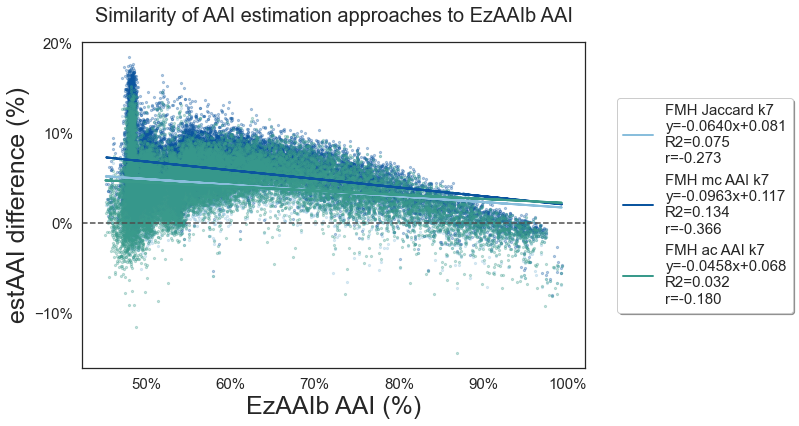

In [174]:
# do the linear regressions manually; plot all on same plot
vars_of_interest = ["jaccard AAI", "maxContain AAI", "avgContain AAI"]
labelD = {"jaccard AAI": "FMH Jaccard k7", "maxContain AAI": "FMH mc AAI k7", "avgContain AAI": "FMH ac AAI k7"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
#plt.figure(figsize=(3,4))
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)

for var in vars_of_interest:
    x_col = "EzAAIb AAI"
    y_col = "AAIdiff"
    color = aai_colors[var]
    df = scaled100_k7[scaled100_k7['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(df[x_col], df[y_col], alpha=0.3, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(df[x_col],df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(df[y_col], predict_y)
    line_label = f'{labelD[var]}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    plt.plot(df[x_col], predict_y, color = color, label = line_label, linewidth=2)


    #plt.plot(df[x_col], predict_y, color = color, label = r_label)
    
#label_line_2 = r'$R^2:{0:.2f}$'.format(0.21) # as an exampple or whatever you want[!
#L_labels[0].set_text(label_line_1)
#L_labels[1].set_text(label_line_2)
    
    
xlim=(0.4, 1)#None
ylim= (-0.2, 0.2)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.axhline(0, ls="--", c=".3")

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


#plt.autoscale(True)
ax.set_ylabel("estAAI difference (%)", size=25)
ax.set_xlabel("EzAAIb AAI (%)", size=25)
#plt.legend(loc = 'best')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
plt.title("Similarity of AAI estimation approaches to EzAAIb AAI", pad=20, size=20)


In [175]:
melted.estimator.unique()

array(['jaccard AAI', 'containA AAI', 'containB AAI', 'maxContain AAI',
       'minContain AAI', 'avgContain AAI', 'compareM AAI', 'EzAAIm AAI'],
      dtype=object)

In [176]:
melted

comparison_name     path lowest_common_rank  \
0       GCA_004524385.1_x_GCA_004524535.1    path1              genus   
1       GCA_004524385.1_x_GCA_004524535.1    path1              genus   
2       GCA_004524385.1_x_GCA_011364975.1    path1             family   
3       GCA_004524385.1_x_GCA_011364975.1    path1             family   
4       GCA_004524385.1_x_GCF_008000775.1    path1              order   
...                                   ...      ...                ...   
786235  GCA_002409405.1_x_GCA_002317435.1  path999              class   
786236  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
786237  GCA_002409405.1_x_GCA_003567135.1  path999             phylum   
786238  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   
786239  GCA_002409405.1_x_GCF_004319585.1  path999       superkingdom   

            anchor_name     compare_name alpha-ksize alphabet  ksize  scaled  \
0       GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     100   
1       GCA_004524385.1  GCA_004524535.1   protein-7  protein      7     200   
2       GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     100   
3       GCA_004524385.1  GCA_011364975.1   protein-7  protein      7     200   
4       GCA_004524385.1  GCF_008000775.1   protein-7  protein      7     100   
...                 ...              ...         ...      ...    ...     ...   
786235  GCA_002409405.1  GCA_002317435.1  protein-10  protein     10     200   
786236  GCA_002409405.1  GCA_003567135.1  protein-10  protein     10     100   
786237  GCA_002409405.1  GCA_003567135.1  protein-10  protein     10     200   
786238  GCA_002409405.1  GCF_004319585.1  protein-10  protein     10     100   
786239  GCA_002409405.1  GCF_004319585.1  protein-10  protein     10     200   

        average_containment  EzAAIb AAI  EzAAIb proteome coverage  \
0                  0.460963    0.929249                  0.569937   
1                  0.457744    0.929249                  0.569937   
2                  0.062064    0.634232                  0.380147   
3                  0.060246    0.634232                  0.380147   
4                  0.017583    0.512164                  0.163390   
...                     ...         ...                       ...   
786235             0.006091    0.541283                  0.138199   
786236             0.003837    0.507907                  0.127947   
786237             0.003365    0.507907                  0.127947   
786238             0.001146    0.484488                  0.085138   
786239             0.001352    0.484488                  0.085138   

          estimator       AAI   AAIdiff  
0       jaccard AAI  0.880078 -0.049171  
1       jaccard AAI       NaN       NaN  
2       jaccard AAI  0.659027  0.024795  
3       jaccard AAI       NaN       NaN  
4       jaccard AAI  0.545423  0.033259  
...             ...       ...       ...  
786235   EzAAIm AAI  0.543715  0.002432  
786236   EzAAIm AAI  0.507298 -0.000610  
786237   EzAAIm AAI  0.507298 -0.000610  
786238   EzAAIm AAI  0.485674  0.001186  
786239   EzAAIm AAI  0.485674  0.001186  

[786240 rows x 15 columns]

In [177]:
ak_dfs = {"protein-7": scaled100_k7, "protein-10": scaled100_k10}
ak_labels = {"protein-7": "scaled=100, k=7", "protein-10": "scaled=100, k=10"}

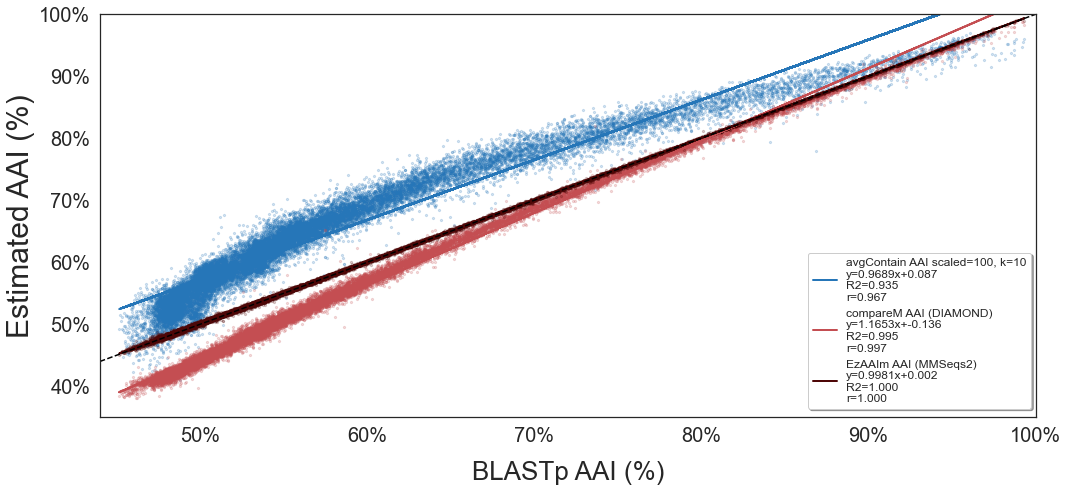

In [303]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

# THIS ak:
aks = ["protein-10"]
# select correct dictionary for this alpha-ksize
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAI"
        #color = aai_colors[var]
        #color = colorD[n]
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.44, 1)#None
ylim=(0.35, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, xlim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 20)
ax.tick_params(axis='y', labelsize= 20)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=30)
ax.set_xlabel("BLASTp AAI (%)", size=26, labelpad=15)
    #plt.legend(loc = 'best')
#lgd = plt.legend(loc='center left', bbox_to_anchor=(0.773, 0.275),fancybox=True, shadow=True, prop={"size":11})
lgd = plt.legend(loc='center left', bbox_to_anchor=(0.75, 0.215),fancybox=True, shadow=True, prop={"size":12})

  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.3.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.3.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

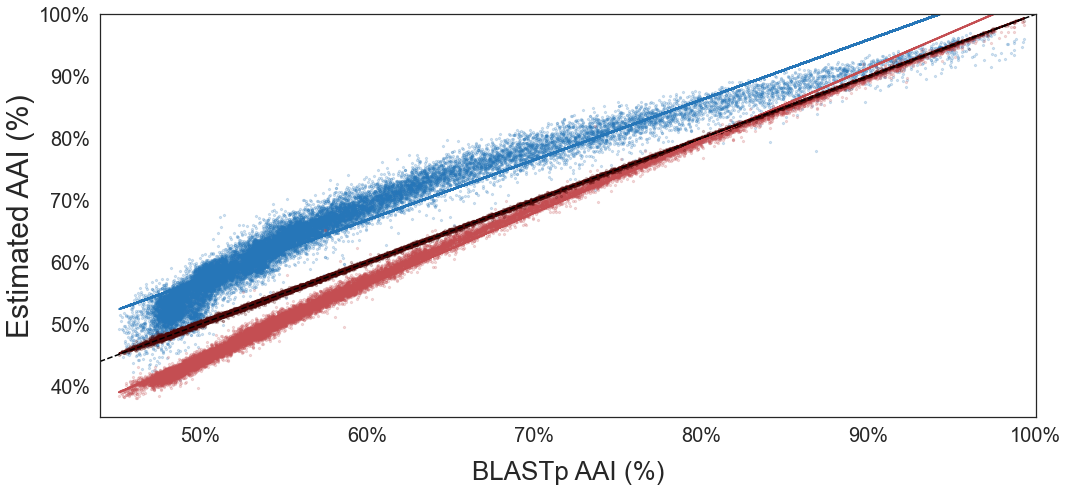

In [311]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

# THIS ak:
aks = ["protein-10"]
# select correct dictionary for this alpha-ksize
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAI"
        #color = aai_colors[var]
        #color = colorD[n]
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.44, 1)#None
ylim=(0.35, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, xlim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 20)
ax.tick_params(axis='y', labelsize= 20)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=30)
ax.set_xlabel("BLASTp AAI (%)", size=26, labelpad=15)
    #plt.legend(loc = 'best')
#lgd = plt.legend(loc='center left', bbox_to_anchor=(0.773, 0.275),fancybox=True, shadow=True, prop={"size":11})
#lgd = plt.legend(loc='center left', bbox_to_anchor=(0.75, 0.215),fancybox=True, shadow=True, prop={"size":12})

  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.3noleg.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.3noleg.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

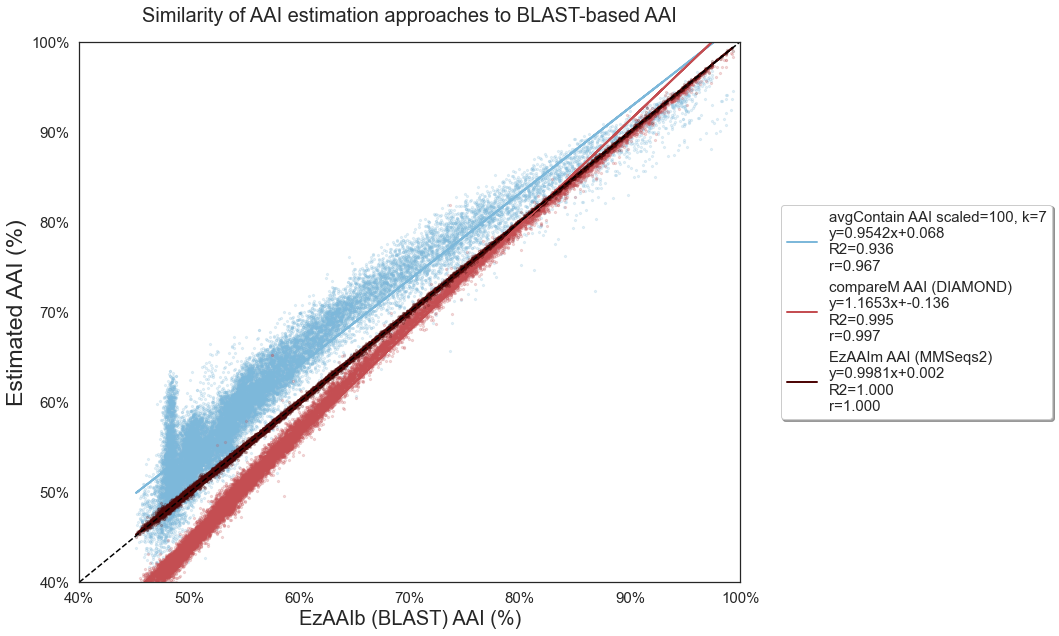

In [179]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f",
#colorD =          ["#399a8b"]

#dfs = [scaled100_k7]
#param_labels = ["scaled=100, k=7"]#,#"scaled=1, k=8"]
aks = ["protein-7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAI"
        #color = aai_colors[var]
        #color = colorD[n]
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.4, 1)#None
ylim=(0.4, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("Estimated AAI (%)", size=23)
ax.set_xlabel("EzAAIb (BLAST) AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k7.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k7.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

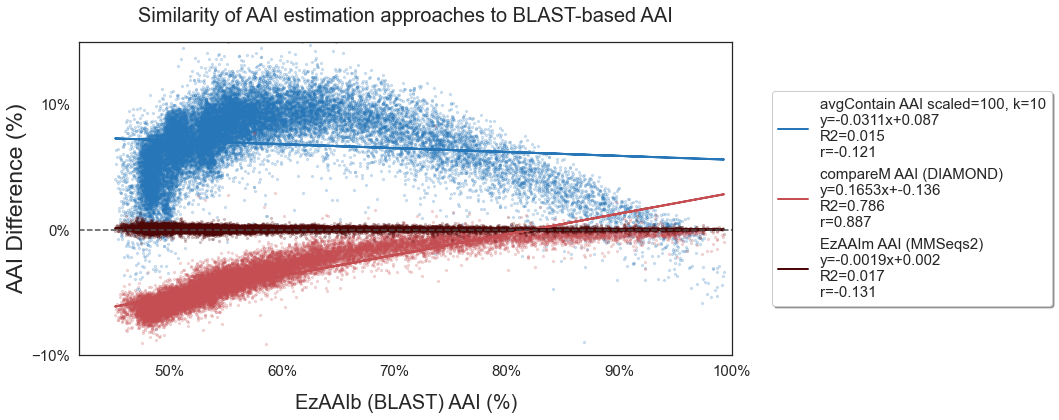

In [180]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

#dfs = [scaled100_k10, scaled100_k7]
#param_labels = ["scaled=100, k=10","scaled=100, k=7"]
aks = ["protein-10"]#, "protein-7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAI"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAIdiff"
        #color = aai_colors[var]
        #color = colorD[n]
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #+ param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAIdiff"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.42, 1)#None
ylim=(-0.1, 0.15)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("AAI Difference (%)", size=23)
ax.set_xlabel("EzAAIb (BLAST) AAI (%)", size=20, labelpad=15)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.diff.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.diff.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

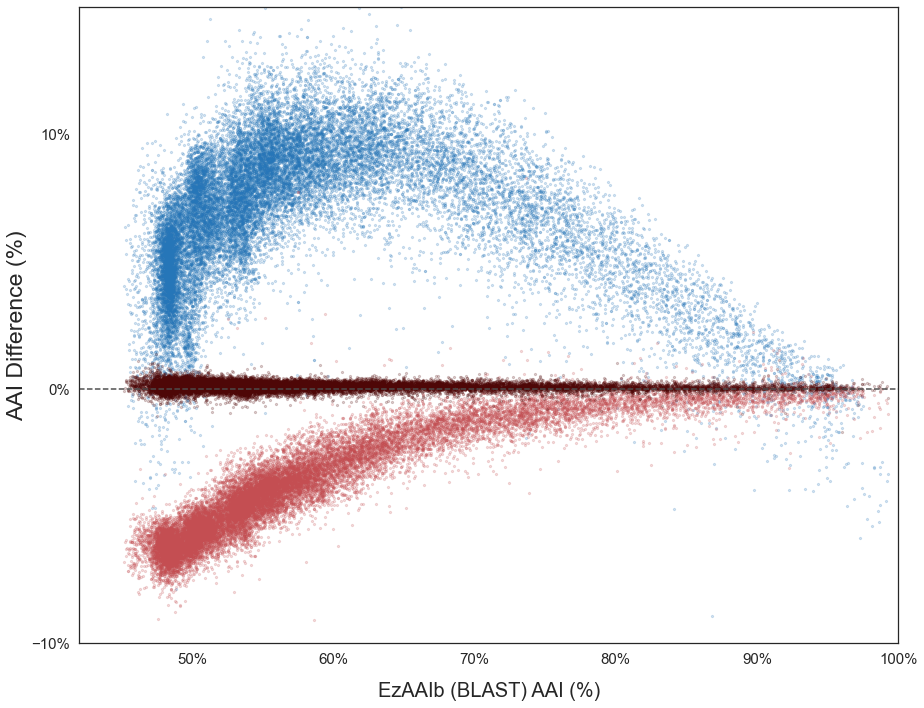

In [273]:
#DIFF, NO LINES
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

#dfs = [scaled100_k10, scaled100_k7]
#param_labels = ["scaled=100, k=10","scaled=100, k=7"]
aks = ["protein-10"]#, "protein-7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAI"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAIdiff"
        #color = aai_colors[var]
        #color = colorD[n]
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #+ param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        #ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAIdiff"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    #ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.42, 1)#None
ylim=(-0.1, 0.15)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("AAI Difference (%)", size=23)
ax.set_xlabel("EzAAIb (BLAST) AAI (%)", size=20, labelpad=15)
    #plt.legend(loc = 'best')
#lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.diff.2.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k10.diff.2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

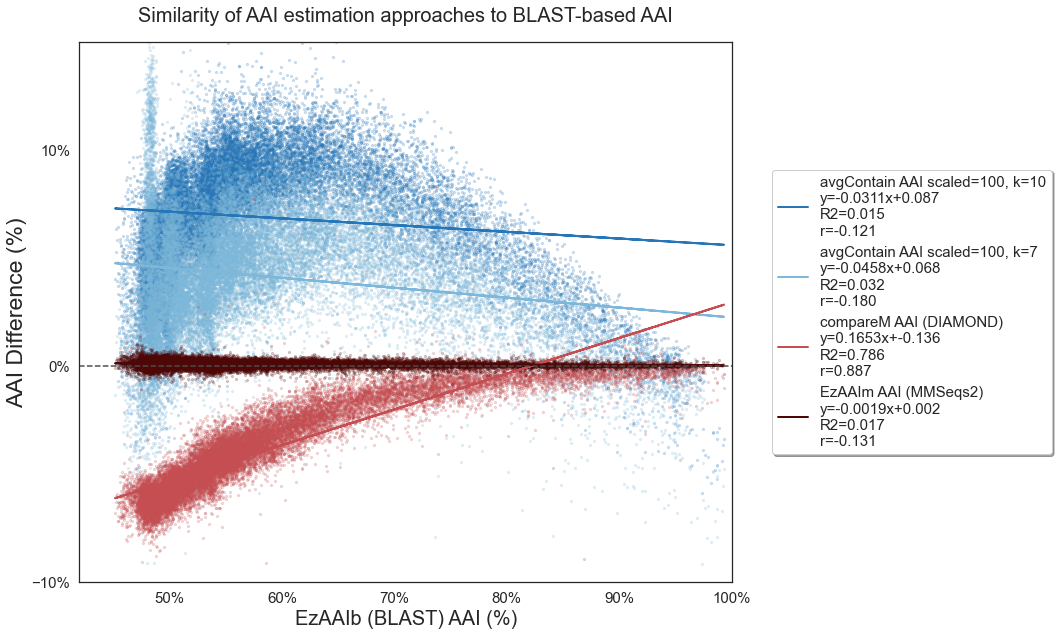

In [181]:
# do the linear regressions manually; plot all on same plot
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

#dfs = [scaled100_k10, scaled100_k7]
#param_labels = ["scaled=100, k=10","scaled=100, k=7"]
aks = ["protein-10", "protein-7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAI"])
    for var in kmer_vars:
        x_col = "EzAAIb AAI"
        y_col = "AAIdiff"
        #color = aai_colors[var]
        #color = colorD[n]
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #+ param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb AAI"
    y_col = "AAIdiff"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0.42, 1)#None
ylim=(-0.1, 0.15)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("AAI Difference (%)", size=23)
ax.set_xlabel("EzAAIb (BLAST) AAI (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k7.k10.diff.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k7.k10.diff.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [182]:
scaled100_k7.columns

Index(['comparison_name', 'path', 'lowest_common_rank', 'anchor_name',
       'compare_name', 'alpha-ksize', 'alphabet', 'ksize', 'scaled',
       'average_containment', 'EzAAIb AAI', 'EzAAIb proteome coverage',
       'estimator', 'AAI', 'AAIdiff'],
      dtype='object')

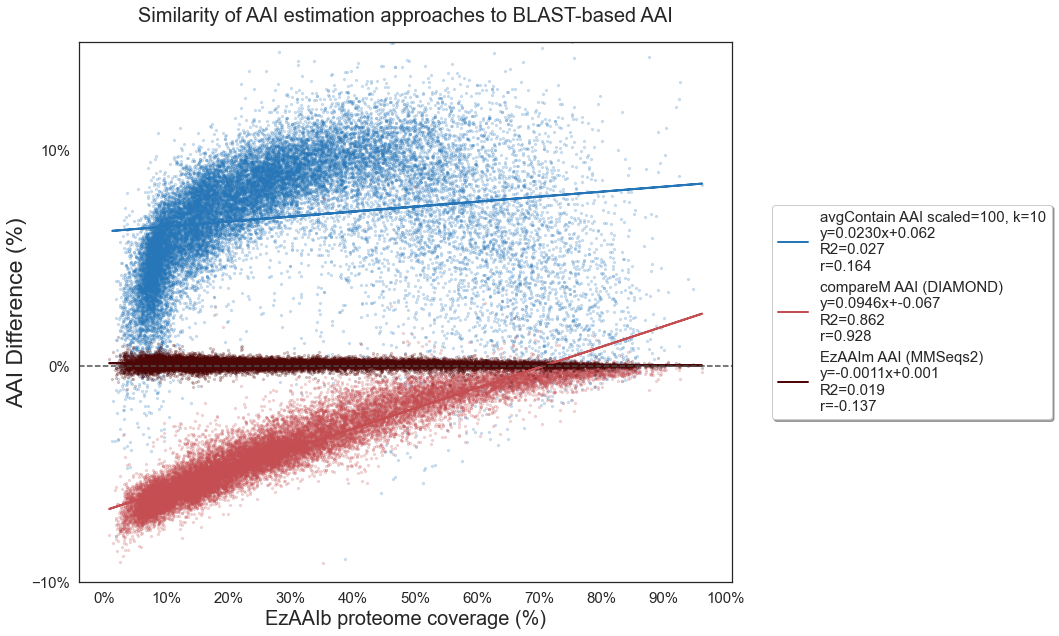

In [183]:
# PLOT ACROSS EzAAI COVERAGE instead
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

colorD = ["#0b559f","#399a8b"]

#dfs = [scaled100_k10]#, scaled100_k7]
#param_labels = ["scaled=100, k=10"]#,"scaled=100, k=7"]
aks = ["protein-10"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAI"])
    for var in kmer_vars:
        x_col = "EzAAIb proteome coverage"
        y_col = "AAIdiff"
        #color = aai_colors[var]
        #color = colorD[n]
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb proteome coverage"
    y_col = "AAIdiff"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
#xlim=(0.42, 1)#None
ylim=(-0.1, 0.15)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
#plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("AAI Difference (%)", size=23)
ax.set_xlabel("EzAAIb proteome coverage (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k7.k10.diff.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIb.k7.k10.diff.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

### Plot estimated AAI across EzAAI COVERAGE instead -- k10 only 

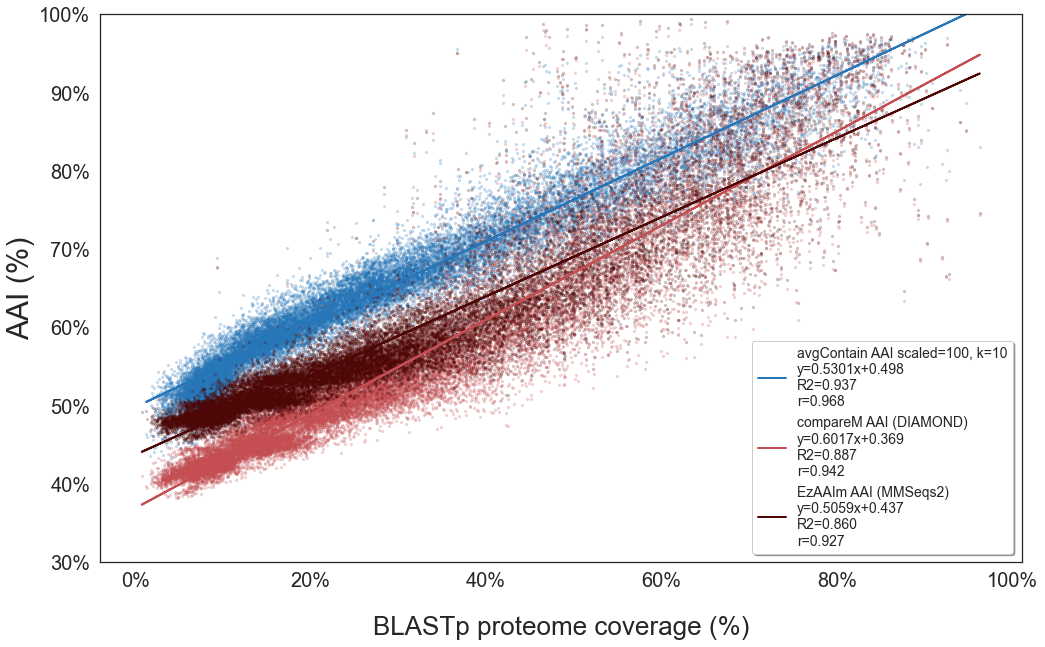

In [287]:
# PLOT ACROSS EzAAI COVERAGE instead
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(13,10))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

aks = ["protein-10"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb proteome coverage"
        y_col = "AAI"
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb proteome coverage"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0., 1)#None
ylim=(0.3, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
#plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 20)
ax.tick_params(axis='y', labelsize= 20)

ax.set_ylabel("AAI (%)", size=30)
ax.set_xlabel("BLASTp proteome coverage (%)", size=26, labelpad=25)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(0.65, 0.2),fancybox=True, shadow=True, prop={"size":14})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("AAI estimates by proteome coverage", pad=20, size=20)

fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k10.2.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k10.2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

plt.gcf().set_size_inches(15, 9)
lgd = plt.legend(loc='center left', bbox_to_anchor=(0.7, 0.21),fancybox=True, shadow=True, prop={"size":14})
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k10.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k10.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

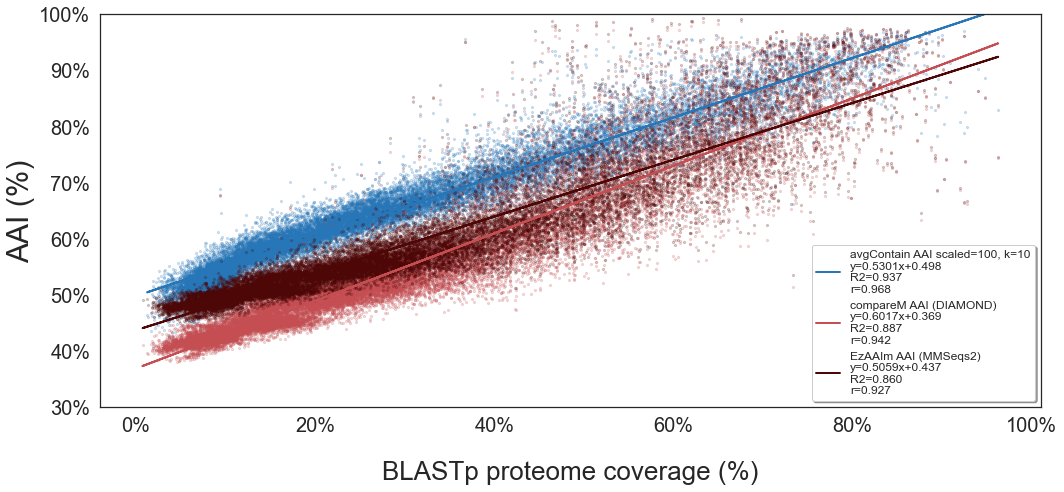

In [308]:
# PLOT ACROSS EzAAI COVERAGE instead
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

aks = ["protein-10"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb proteome coverage"
        y_col = "AAI"
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb proteome coverage"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0., 1)#None
ylim=(0.3, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
#plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 20)
ax.tick_params(axis='y', labelsize= 20)

ax.set_ylabel("AAI (%)", size=30)
ax.set_xlabel("BLASTp proteome coverage (%)", size=26, labelpad=25)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(0.75, 0.215),fancybox=True, shadow=True, prop={"size":12})

  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("AAI estimates by proteome coverage", pad=20, size=20)

fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k10.3.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k10.3.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

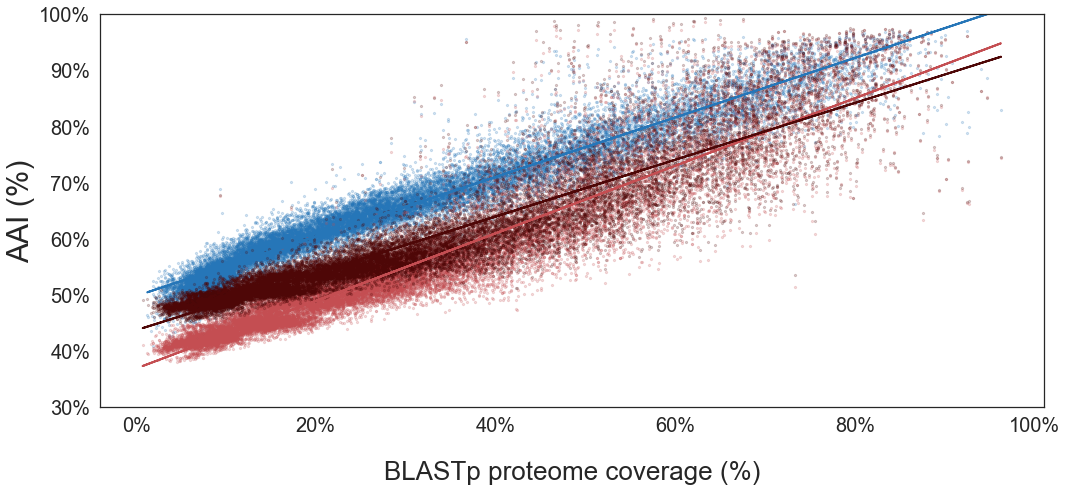

In [310]:
# PLOT ACROSS EzAAI COVERAGE instead
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

aks = ["protein-10"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb proteome coverage"
        y_col = "AAI"
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb proteome coverage"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0., 1)#None
ylim=(0.3, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
#plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 20)
ax.tick_params(axis='y', labelsize= 20)

ax.set_ylabel("AAI (%)", size=30)
ax.set_xlabel("BLASTp proteome coverage (%)", size=26, labelpad=25)
    #plt.legend(loc = 'best')
#lgd = plt.legend(loc='center left', bbox_to_anchor=(0.75, 0.215),fancybox=True, shadow=True, prop={"size":12})

  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("AAI estimates by proteome coverage", pad=20, size=20)

fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k10.3noleg.pdf", bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k10.3noleg.png", bbox_inches='tight')

### PLOT ACROSS EzAAI COVERAGE instead -- k7 AND k10  

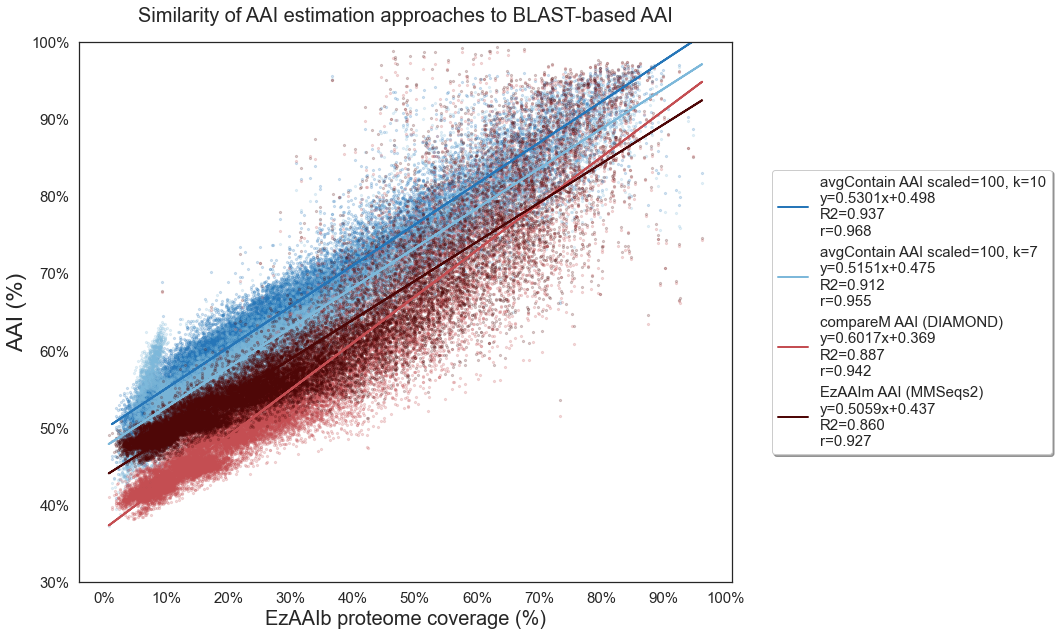

In [185]:
# PLOT ACROSS EzAAI COVERAGE instead -- wiht k7 AND k10
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

#dfs = [scaled100_k10, scaled100_k7]
#param_labels = ["scaled=100, k=10","scaled=100, k=7"]
aks = ["protein-10", "protein-7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "EzAAIb proteome coverage"
        y_col = "AAI"
        #color = aai_colors[var]
        #color = colorD[n]
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "EzAAIb proteome coverage"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    r_squared = r2_score(var_df[y_col], predict_y)
    label = labelD[var]# + " " + param_labels[n]
    line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
#xlim=(0.42, 1)#None
ylim=(0.3, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
#plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)


    #plt.autoscale(True)
ax.set_ylabel("AAI (%)", size=23)
ax.set_xlabel("EzAAIb proteome coverage (%)", size=20)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Similarity of AAI estimation approaches to BLAST-based AAI", pad=20, size=20)
#fig.suptitle("Similarity of AAI estimation approaches to EzAAIm AAI", size=20)#, pad=20, size=20)
fig.tight_layout()
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k7.k10.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
fig.savefig("gtdb-rs202.evolpaths.AAIcompare-EzAAIbcoverage.k7.k10.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

# plot AAI vs average containment

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


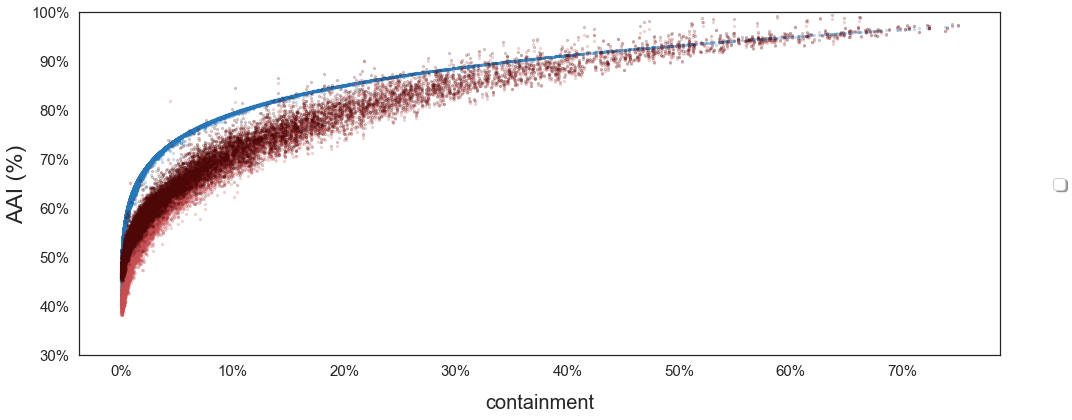

In [316]:
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
mapping_vars = ["compareM AAI", "EzAAIm AAI"]
vars_of_interest = kmer_vars + mapping_vars
labelD = {"jaccard AAI": "Jaccard", "maxContain AAI": "maxContain AAI", "avgContain AAI": "avgContain AAI", "compareM AAI": "compareM AAI (DIAMOND)", "EzAAIm AAI": "EzAAIm AAI (MMSeqs2)"}
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)


aai_colors = {"jaccard AAI":"#89bedc", "maxContain AAI":"#0b559f", 
              "containA AAI":'#2b7bba', "compareM AAI":"#c44e52", 
              "fastani_ident": "#c44e52", "containB AAI": "#74c476", 
              "minContain AAI": "#006400", 'pyani_ident': "#A3623A", 
              "avgContain AAI": "#399a8b", "EzAAIm AAI": "#4E0707",
              "EzAAIb AAI": "#4E0707"}

#colorD = ["#0b559f","#399a8b"]

aks = ["protein-10"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "average_containment"
        y_col = "AAI"
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
        #r_value is pearson correlation coefficient
        predict_y = slope * var_df[x_col] + intercept
        # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
        r_squared = r2_score(var_df[y_col], predict_y)
        #label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        #line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        #ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)

for var in mapping_vars:
    x_col = "average_containment"
    y_col = "AAI"
    color = aai_colors[var]
    var_df = df[df['estimator'] == var].dropna()
    #df = above_75[above_75['estimator'] == var].dropna()
    ax.scatter(var_df[x_col], var_df[y_col], alpha=0.2, marker='o', s=5,color=color)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(var_df[x_col],var_df[y_col])
    #r_value is pearson correlation coefficient
    predict_y = slope * var_df[x_col] + intercept
    # do we want R^2? if yes, get from sklearn r2_score using y_observed, y_predicted
    #r_squared = r2_score(var_df[y_col], predict_y)
    #label = labelD[var]# + " " + param_labels[n]
    #line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
    #ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
xlim=(0, 1)#None
ylim=(0.3, 1)
#ax.plot(xlim, ylim, ls="--",color="darkgrey") #c=".3"
#ax.plot(xlim, ylim, ls="--",color="black") #c=".3"
#plt.xlim(xlim)
plt.ylim(ylim)
ax.axhline(0, ls="--", c=".3")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)

ax.set_ylabel("AAI (%)", size=23)
ax.set_xlabel("containment", size=20, labelpad=15)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("AAI estimates by proteome coverage", pad=20, size=20)

fig.tight_layout()
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-containment.k10.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-containment.k10.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [343]:
contain_vs_blastAAI = melted[["comparison_name","EzAAIb AAI", "average_containment", "ksize", "scaled"]].drop_duplicates()
contain_vs_blastAAI = contain_vs_blastAAI[ (contain_vs_blastAAI["scaled"] == 100)] # &(contain_vs_blastAAI["ksize"] == 10)
contain_vs_blastAAI.head()

comparison_name  EzAAIb AAI  average_containment  ksize  \
0  GCA_004524385.1_x_GCA_004524535.1    0.929249             0.460963      7   
2  GCA_004524385.1_x_GCA_011364975.1    0.634232             0.062064      7   
4  GCA_004524385.1_x_GCF_008000775.1    0.512164             0.017583      7   
6  GCA_004524385.1_x_GCA_013375405.1    0.519141             0.015924      7   
8  GCA_004524385.1_x_GCA_004524565.1    0.477452             0.007684      7   

   scaled  
0     100  
2     100  
4     100  
6     100  
8     100

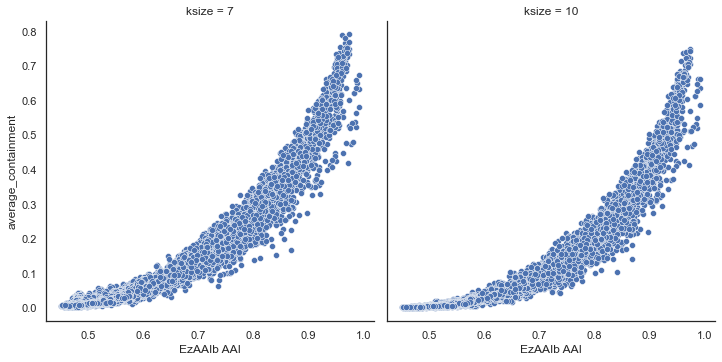

In [346]:
g = sns.relplot(data=contain_vs_blastAAI, x = "EzAAIb AAI", y="average_containment", col="ksize")

# containment vs BLAST coverage

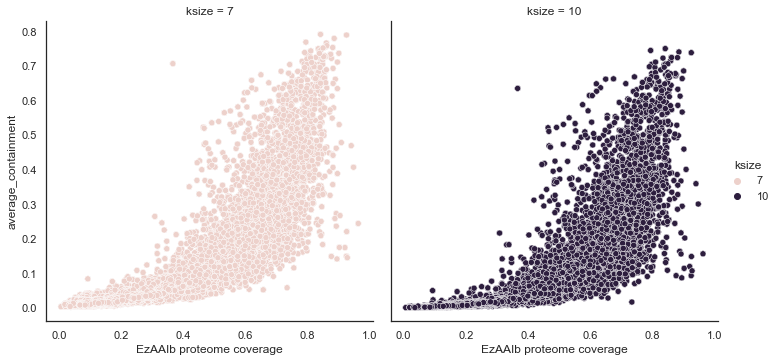

In [187]:
#sns.set() # reset defaults
#with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
#    sns.set_style("whitegrid")
g=sns.relplot(data=scaled100, 
                  x="EzAAIb proteome coverage", y="average_containment", 
                  col="ksize", hue="ksize") 
                  #hue="estimator",col="estimator", 
              # palette=aai_colors)
    
    #plt.gcf().set_size_inches(11, 7)
    #xlim=(0.3, 1)
    #ylim= (0.3, 1)
    #for ax in g.fig.axes:
    #    ax.set(xlim=xlim, ylim=ylim)
    #    ax.plot(xlim, ylim, ls="--", c=".3")
    #    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    #    ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    
    #g.set_axis_labels("EzAAIb AAI", "K-mer AAI", size=20, labelpad=15)
    #g.fig.suptitle('evolpaths: EzAAIb AAI vs k-mer based AAI')
    #g.fig.tight_layout()
    #plt.xlabel("FastANI ANI", size=20, labelpad=15)
    #plt.ylabel("K-mer ANI", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


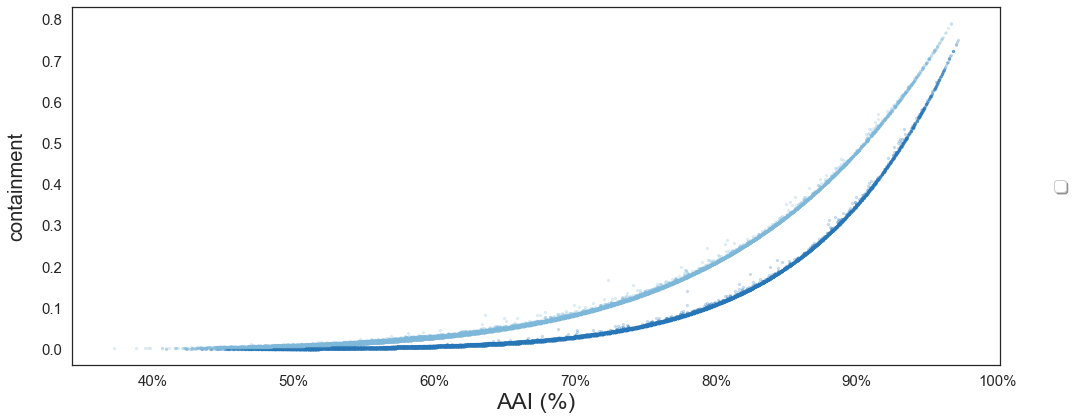

In [199]:
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
vars_of_interest = kmer_vars# + mapping_vars
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
aks = ["protein-10", "protein-7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "AAI"
        y_col = "average_containment"
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        #line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        #ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
#plt.yscale("log")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)

ax.set_xlabel("AAI (%)", size=23)
ax.set_ylabel("containment", size=20, labelpad=15)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("AAI estimates by proteome coverage", pad=20, size=20)

fig.tight_layout()
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-containment.k10.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-containment.k10.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

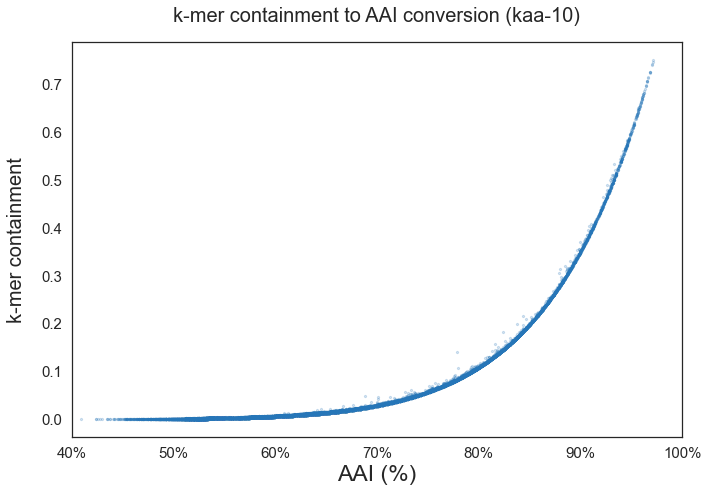

In [213]:
# just k10
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
vars_of_interest = kmer_vars# + mapping_vars
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
aks = ["protein-10"]#, "protein-7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "AAI"
        y_col = "average_containment"
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        
xlim=(0.4, 1)#None

plt.xlim(xlim)
#plt.ylim(ylim)
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)

ax.set_xlabel("AAI (%)", size=23)
ax.set_ylabel("k-mer containment", size=20, labelpad=15)
    #plt.legend(loc = 'best')
#lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("k-mer containment to AAI conversion (kaa-10)", pad=20, size=20)

fig.tight_layout()
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-containment.k10.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-containment.k10.png", bbox_extra_artists=(lgd,), bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


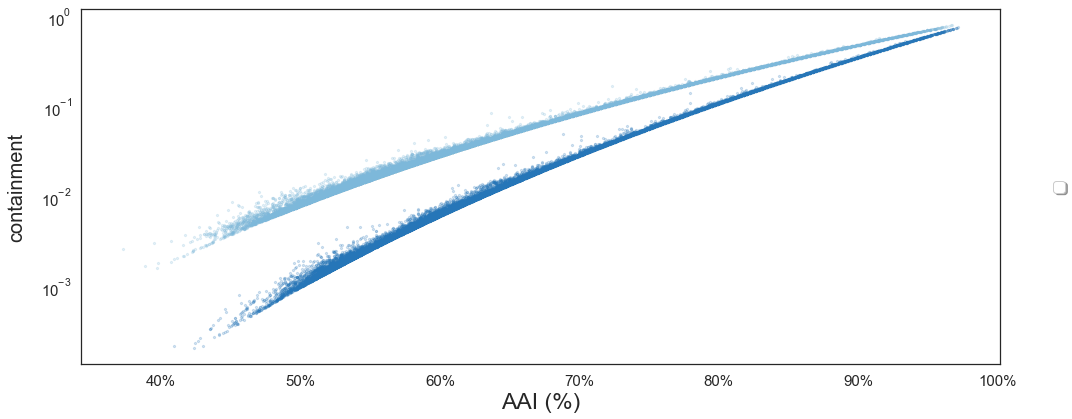

In [200]:
# LOG SCALE
kmer_vars = ["avgContain AAI"]#, "maxContain AAI"]
vars_of_interest = kmer_vars# + mapping_vars
sns.set_style("white")
#plt.rcParams["font.size"] = 25
# start the plot
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)
aks = ["protein-10", "protein-7"]
alphaD = [0.2, 0.2]
linewidthD = [2, 2]

for n, ak in enumerate(aks):
    df = ak_dfs[ak]
    df = df.drop(columns= ["AAIdiff"])
    for var in kmer_vars:
        x_col = "AAI"
        y_col = "average_containment"
        color = protein_colors[ak]
        var_df = df[df['estimator'] == var].dropna()
        #df = above_75[above_75['estimator'] == var].dropna()
        ax.scatter(var_df[x_col], var_df[y_col], alpha=alphaD[n], marker='o', s=5,color=color)
        label = labelD[var] + " " + ak_labels[ak] #param_labels[n]
        #line_label = f'{label}\ny={slope:.4f}x+{intercept:.3f}\nR2={r_squared:.3f}\nr={r_value:.3f}'
        #ax.plot(var_df[x_col], predict_y, color = color, label = line_label, linewidth=2)
        
plt.yscale("log")


ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
ax.tick_params(axis='x', labelsize= 15)
ax.tick_params(axis='y', labelsize= 15)

ax.set_xlabel("AAI (%)", size=23)
ax.set_ylabel("containment", size=20, labelpad=15)
    #plt.legend(loc = 'best')
lgd = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),fancybox=True, shadow=True, prop={"size":15})
  #  lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.title("AAI estimates by proteome coverage", pad=20, size=20)

fig.tight_layout()
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-containment.k10.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')
#fig.savefig("gtdb-rs202.evolpaths.AAIcompare-containment.k10.png", bbox_extra_artists=(lgd,), bbox_inches='tight')